# Introduction
We will use the Decision Tree algorithm using the Breast Cancer dataset. We'll demonstrate how the choices of different splitting criteria (Information and Gini Index) and tree pruning (max depth) affect the classification results. We'll print the results of the classification and visualize the accuracy vs hyperparameters for comparison.

# Decision Tree Algorithm

## Overview
A **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the dataset into subsets based on the most important feature, creating a tree-like structure. The goal is to create branches that lead to homogeneous nodes (where data belongs to a single class in the case of classification).

## How Decision Trees Work
1. At each node, the dataset is split based on the feature that provides the best separation of the target classes.
2. The process is repeated recursively for each branch until all the data is classified, or a stopping criterion (like maximum depth) is met.
3. The final nodes, called **leaf nodes**, represent the final class or predicted outcome.

### Splitting Criteria
There are several ways to measure the quality of a split in a decision tree. The two most common are **Gini Impurity** and **Entropy (Information Gain)**.

### Gini Impurity
**Gini Impurity** is a measure of how often a randomly chosen element from the set would be incorrectly classified. A Gini Impurity of 0 means perfect classification.

The Gini Impurity is calculated as:

$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

Where:
- \( p_i \) is the proportion of samples belonging to class \( i \).
- \( n \) is the total number of classes.

### Entropy and Information Gain
**Entropy** is a measure of impurity or uncertainty. It is used in the **Information Gain** criterion, which is a common splitting criterion for decision trees. The goal is to reduce entropy, leading to more homogeneous nodes.

Entropy is calculated as:

$$
Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

Where:
- \( p_i \) is the proportion of samples belonging to class \( i \).
- \( n \) is the number of classes.

**Information Gain** is the reduction in entropy after a dataset is split on a feature:

$$
IG = Entropy_{parent} - \sum \left(\frac{|subset|}{|parent|} \times Entropy_{subset}\right)
$$

Where:
- \( Entropy_{parent} \) is the entropy before the split.
- \( Entropy_{subset} \) is the entropy of each subset after the split.

## Advantages of Decision Trees
- **Easy to interpret**: Decision Trees are highly interpretable, as the rules used for predictions can be visualized.
- **Non-parametric**: No assumptions are made about the data distribution.
- **Can handle both numerical and categorical data**: Decision Trees can work with any type of feature.

## Limitations of Decision Trees
- **Prone to overfitting**: Trees can grow too complex and fit the noise in the data.
- **Sensitive to small changes**: Small changes in the data can result in completely different splits.
- **Not suitable for very large datasets**: Decision Trees can be computationally expensive with large datasets.

## Overfitting and Underfitting
- **Overfitting**: Occurs when the tree becomes too deep, capturing noise and variations in the training data.
- **Underfitting**: Occurs when the tree is too shallow, failing to capture the complexity of the data.

## Regularization to Avoid Overfitting
- **Maximum Depth**: Limit the depth of the tree to control its complexity.
- **Minimum Samples per Leaf**: Specify the minimum number of samples required to be at a leaf node.
- **Pruning**: Remove branches that add little predictive power to reduce complexity.

# Setup
Import necessary librairies and load the Breast Cancer dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets

In [23]:
# Split the data into training and test sets (80% training, 20% test)
# random_state is set to 42 to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model with different splitting criteria and max depth

In [24]:
# Create a list of splitting criteria
splitting_criteria = ['gini', 'entropy']

# Create a list of maximum depths
max_depths = range(1, 20, 2)

# Create an empty dictionary to store the results
results = {}

# Train a Decision Tree model for each splitting criterion and maximum depth
for criterion in splitting_criteria:
    for max_depth in max_depths:
        # Create a Decision Tree model
        model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=2)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results[(criterion, max_depth)] = {
            'model': model,
            'accuracy': accuracy
        }

In [25]:
# Print the results of the classification
print("Results of Decision Tree Classification:")
for (criterion, max_depth), result in results.items():
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Accuracy: {result['accuracy']:.2f}")

Results of Decision Tree Classification:
Criterion: gini, Max Depth: 1, Accuracy: 0.89
Criterion: gini, Max Depth: 3, Accuracy: 0.95
Criterion: gini, Max Depth: 5, Accuracy: 0.95
Criterion: gini, Max Depth: 7, Accuracy: 0.95
Criterion: gini, Max Depth: 9, Accuracy: 0.95
Criterion: gini, Max Depth: 11, Accuracy: 0.95
Criterion: gini, Max Depth: 13, Accuracy: 0.95
Criterion: gini, Max Depth: 15, Accuracy: 0.95
Criterion: gini, Max Depth: 17, Accuracy: 0.95
Criterion: gini, Max Depth: 19, Accuracy: 0.95
Criterion: entropy, Max Depth: 1, Accuracy: 0.89
Criterion: entropy, Max Depth: 3, Accuracy: 0.96
Criterion: entropy, Max Depth: 5, Accuracy: 0.96
Criterion: entropy, Max Depth: 7, Accuracy: 0.95
Criterion: entropy, Max Depth: 9, Accuracy: 0.95
Criterion: entropy, Max Depth: 11, Accuracy: 0.95
Criterion: entropy, Max Depth: 13, Accuracy: 0.95
Criterion: entropy, Max Depth: 15, Accuracy: 0.95
Criterion: entropy, Max Depth: 17, Accuracy: 0.95
Criterion: entropy, Max Depth: 19, Accuracy: 0.95

# Visualize the accuracy vs hyperparameters for comparaison.

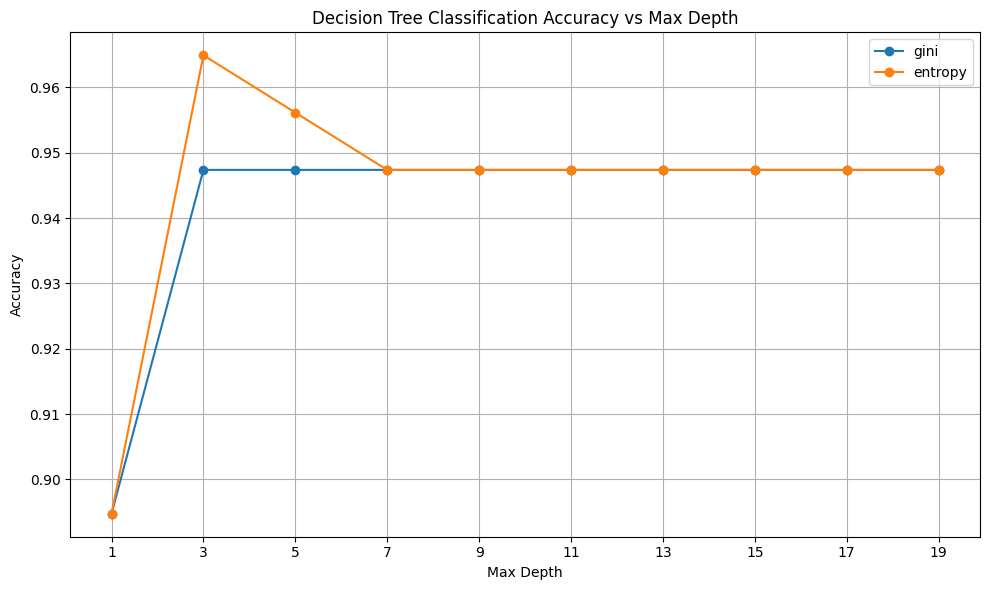

In [26]:
# Visualize the accuracy vs max depth for each splitting criterion
plt.figure(figsize=(10, 6))
for criterion in splitting_criteria:
    accuracies = [result['accuracy'] for (c, d), result in results.items() if c == criterion]
    plt.plot(max_depths, accuracies, marker='o', label=criterion)
plt.title("Decision Tree Classification Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion

This tutorial covers the Decision Tree algorithm using the Breast Cancer dataset. It demonstrates how different splitting criteria (Information Gain and Gini Index) and tree pruning (max depth) affect the classification results. The tutorial prints the accuracy of the models with different hyperparameters and visualizes the accuracy vs max depth for each splitting criterion for comparison.